# <center> Space Dataset from Maven Analytics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Importing Data
**Reading Excel or csv**

In [2]:
baby = pd.read_excel('babynames.xlsx')
baby.head(3)

,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
0,2011,MALE,ASIAN AND PACIFIC ISLANDER,AARAV,15,51
1,2011,MALE,ASIAN AND PACIFIC ISLANDER,AARON,51,19
2,2011,MALE,ASIAN AND PACIFIC ISLANDER,ABDUL,20,46


In [3]:
sp = pd.read_csv('space_miss.csv')
sp.head(10)

,Company,Location,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus
0,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-10-04,19:28:00,Sputnik 8K71PS,Sputnik-1,Retired,NaN,Success
1,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03,02:30:00,Sputnik 8K71PS,Sputnik-2,Retired,NaN,Success
2,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06,16:44:00,Vanguard,Vanguard TV3,Retired,NaN,Failure
3,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01,03:48:00,Juno I,Explorer 1,Retired,NaN,Success
4,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05,07:33:00,Vanguard,Vanguard TV3BU,Retired,NaN,Failure
5,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-03-05,18:27:00,Juno I,Explorer 2,Retired,NaN,Failure
6,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-03-17,12:15:00,Vanguard,Vanguard 1,Retired,NaN,Success
7,AMBA,"LC-5, Cape Canaveral AFS, Florida, USA",1958-03-26,17:38:00,Juno I,Explorer 3,Retired,NaN,Success
8,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1958-04-27,09:01:00,Sputnik 8A91,Sputnik-3 #1,Retired,NaN,Failure
9,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-04-28,02:53:00,Vanguard,Vanguard TV5,Retired,NaN,Failure


# 1 . Data Understanding

 **Understanding the Columns and Datatypes**

In [4]:
sp.columns

Index(['Company', 'Location', 'Date', 'Time', 'Rocket', 'Mission',
       'RocketStatus', 'Price', 'MissionStatus'],
      dtype='object')

In [5]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4630 entries, 0 to 4629
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company        4630 non-null   object
 1   Location       4630 non-null   object
 2   Date           4630 non-null   object
 3   Time           4503 non-null   object
 4   Rocket         4630 non-null   object
 5   Mission        4630 non-null   object
 6   RocketStatus   4630 non-null   object
 7   Price          1265 non-null   object
 8   MissionStatus  4630 non-null   object
dtypes: object(9)
memory usage: 325.7+ KB


In [6]:
sp.describe()

,Company,Location,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus
count,4630,4630,4630,4503,4630,4630,4630,1265,4630
unique,62,158,4180,1300,370,4556,2,65,4
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan",1962-04-26,12:00:00,Cosmos-3M (11K65M),DSP,Retired,450,Success
freq,1777,251,4,52,446,8,3620,136,4162


In [7]:
sp.isna()

,Company,Location,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus
0,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...
4625,False,False,False,False,False,False,False,False,False
4626,False,False,False,False,False,False,False,True,False
4627,False,False,False,False,False,False,False,False,False
4628,False,False,False,False,False,False,False,True,False


In [8]:
sp.isna().sum()

Company             0
Location            0
Date                0
Time              127
Rocket              0
Mission             0
RocketStatus        0
Price            3365
MissionStatus       0
dtype: int64

In [9]:
sp.isna().sum().sort_values(ascending=False)

Price            3365
Time              127
MissionStatus       0
RocketStatus        0
Mission             0
Rocket              0
Date                0
Location            0
Company             0
dtype: int64

In [10]:
Missing_percentage = round((sp.isna().sum().sort_values(ascending=False)/len(sp))*100,0)
Missing_percentage

Price            73.0
Time              3.0
MissionStatus     0.0
RocketStatus      0.0
Mission           0.0
Rocket            0.0
Date              0.0
Location          0.0
Company           0.0
dtype: float64

In [11]:
Missing_percentage[Missing_percentage > 0]

Price    73.0
Time      3.0
dtype: float64

- Entries in Time and Price are missing 
- Unique - 62 companies, 370 rockets, 158 locations & 4556 Missions

**Datatype Conversion**

**Was unable to convert price to Float ($ sign or comma seaprators).So they have to be removed and assigned to numeric or float**

In [12]:
sp['Price'] = sp['Price'].replace(',','',regex=True)

In [13]:
sp = sp.astype( {'Company':object, 'Location':object, 'Date':object, 'Time':object,
                 'Rocket':object, 'Mission':object,'RocketStatus':object, 'Price':float ,'MissionStatus':object})

sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4630 entries, 0 to 4629
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        4630 non-null   object 
 1   Location       4630 non-null   object 
 2   Date           4630 non-null   object 
 3   Time           4503 non-null   object 
 4   Rocket         4630 non-null   object 
 5   Mission        4630 non-null   object 
 6   RocketStatus   4630 non-null   object 
 7   Price          1265 non-null   float64
 8   MissionStatus  4630 non-null   object 
dtypes: float64(1), object(8)
memory usage: 325.7+ KB


In [14]:
#sp['Price']= pd.to_numeric(sp['Price'],errors='coerce')

In [15]:
sp['Date']= pd.to_datetime(sp['Date'])
sp['Time']= pd.to_datetime(sp['Time'])
sp['Time'] = sp['Time'].dt.time
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4630 entries, 0 to 4629
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Company        4630 non-null   object        
 1   Location       4630 non-null   object        
 2   Date           4630 non-null   datetime64[ns]
 3   Time           4503 non-null   object        
 4   Rocket         4630 non-null   object        
 5   Mission        4630 non-null   object        
 6   RocketStatus   4630 non-null   object        
 7   Price          1265 non-null   float64       
 8   MissionStatus  4630 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 325.7+ KB


In [16]:
sp.head(5)

,Company,Location,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus
0,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-10-04,19:28:00,Sputnik 8K71PS,Sputnik-1,Retired,NaN,Success
1,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03,02:30:00,Sputnik 8K71PS,Sputnik-2,Retired,NaN,Success
2,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06,16:44:00,Vanguard,Vanguard TV3,Retired,NaN,Failure
3,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01,03:48:00,Juno I,Explorer 1,Retired,NaN,Success
4,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05,07:33:00,Vanguard,Vanguard TV3BU,Retired,NaN,Failure


In [47]:
sp.describe()

,Price,Year,Month,Hour
count,1265.000000,4630.000000,4630.000000,4503.000000
mean,128.303913,1989.616199,6.765227,11.640240
std,256.769663,19.373003,3.423572,6.745207
min,2.500000,1957.000000,1.000000,0.000000
25%,30.000000,1973.000000,4.000000,6.000000
50%,63.230000,1987.000000,7.000000,11.000000
75%,115.000000,2007.000000,10.000000,17.000000
max,5000.000000,2022.000000,12.000000,23.000000


- Keep in mind the values for price attribute had more than 2000 null values. So the above stats doesnot provide the right understanding of the Price attribute

**Remove or Add Coloumns accroding to the needs for analysis**

In [17]:
sp.Location.str.split(pat=",",n=4, expand=True) #n is max separations


,0,1,2,3,4
0,Site 1/5,Baikonur Cosmodrome,Kazakhstan,None,None
1,Site 1/5,Baikonur Cosmodrome,Kazakhstan,None,None
2,LC-18A,Cape Canaveral AFS,Florida,USA,None
3,LC-26A,Cape Canaveral AFS,Florida,USA,None
4,LC-18A,Cape Canaveral AFS,Florida,USA,None
...,...,...,...,...,...
4625,SLC-4E,Vandenberg SFB,California,USA,None
4626,LC-101,Wenchang Satellite Launch Center,China,None,None
4627,LC-39A,Kennedy Space Center,Florida,USA,None
4628,Jiuquan Satellite Launch Center,China,None,None,None


In [19]:
sp['Year']= sp['Date'].dt.year
sp['Month']= sp['Date'].dt.month
sp['Day']= sp['Date'].dt.day

sp.head(5)

,Company,Location,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus,Year,Month,Day
0,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-10-04,19:28:00,Sputnik 8K71PS,Sputnik-1,Retired,NaN,Success,1957,10,4
1,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03,02:30:00,Sputnik 8K71PS,Sputnik-2,Retired,NaN,Success,1957,11,3
2,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06,16:44:00,Vanguard,Vanguard TV3,Retired,NaN,Failure,1957,12,6
3,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01,03:48:00,Juno I,Explorer 1,Retired,NaN,Success,1958,2,1
4,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05,07:33:00,Vanguard,Vanguard TV3BU,Retired,NaN,Failure,1958,2,5


In [32]:
c= sp['Time'].astype(str)
sp['Hour']= c.str.slice(0,2,)
sp['Hour']

0       19
1       02
2       16
3       03
4       07
        ..
4625    17
4626    06
4627    13
4628    04
4629    13
Name: Hour, Length: 4630, dtype: object

In [33]:
columns = ['Company', 'Location', 'Date', 'Year', 'Month','Day', 'Time','Hour', 'Rocket', 'Mission',
       'RocketStatus', 'Price', 'MissionStatus']
sp = sp[columns]
sp.head(5)

,Company,Location,Date,Year,Month,Day,Time,Hour,Rocket,Mission,RocketStatus,Price,MissionStatus
0,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-10-04,1957,10,4,19:28:00,19,Sputnik 8K71PS,Sputnik-1,Retired,NaN,Success
1,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03,1957,11,3,02:30:00,02,Sputnik 8K71PS,Sputnik-2,Retired,NaN,Success
2,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06,1957,12,6,16:44:00,16,Vanguard,Vanguard TV3,Retired,NaN,Failure
3,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01,1958,2,1,03:48:00,03,Juno I,Explorer 1,Retired,NaN,Success
4,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05,1958,2,5,07:33:00,07,Vanguard,Vanguard TV3BU,Retired,NaN,Failure


# 2.Exploratory Data Analysis

## Popular Companies

In [37]:
pop_companies= sp.Company.value_counts()
pop_companies

RVSN USSR           1777
CASC                 338
Arianespace          293
General Dynamics     251
VKS RF               216
                    ... 
OneSpace               1
EER                    1
Khrunichev             1
Douglas                1
GK LS                  1
Name: Company, Length: 62, dtype: int64

**Top 10 companies**

In [38]:
pop_companies[:10]

RVSN USSR           1777
CASC                 338
Arianespace          293
General Dynamics     251
VKS RF               216
NASA                 203
SpaceX               182
US Air Force         161
ULA                  151
Boeing               136
Name: Company, dtype: int64

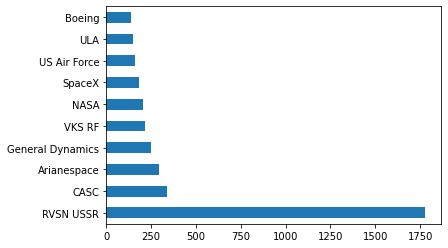

In [39]:
pop_companies[:10].plot(kind='barh')

In [40]:
pg_pop_companies= (sp.Company.value_counts())/(len(sp['Company']))*100
pg_pop_companies

RVSN USSR           38.380130
CASC                 7.300216
Arianespace          6.328294
General Dynamics     5.421166
VKS RF               4.665227
                      ...    
OneSpace             0.021598
EER                  0.021598
Khrunichev           0.021598
Douglas              0.021598
GK LS                0.021598
Name: Company, Length: 62, dtype: float64

In [41]:
pg_pop_companies[:10]

RVSN USSR           38.380130
CASC                 7.300216
Arianespace          6.328294
General Dynamics     5.421166
VKS RF               4.665227
NASA                 4.384449
SpaceX               3.930886
US Air Force         3.477322
ULA                  3.261339
Boeing               2.937365
Name: Company, dtype: float64

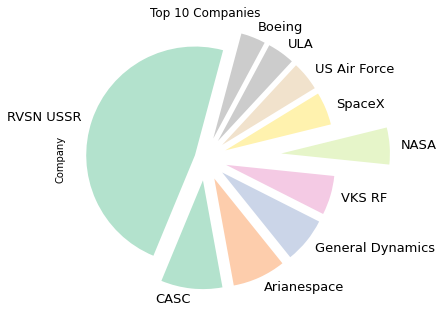

In [63]:
kwargs = dict(
    startangle = 75,
    colormap   = 'Pastel2',
    fontsize   = 13,
    explode    = (0.1,0.2,0.2,0.2,0.2,0.7,0.2,0.2,0.2,0.2),
    figsize    = (60,5),
    #autopct    = '%1.1f%%',
    title      = 'Top 10 Companies'
)

pg_pop_companies[:10].plot.pie(**kwargs)

- USSR dominates space launches by 38% . 
- NASA is at 6th position with 4% (203) launches

## Popular Rockets

In [64]:
pop_rockets = sp.Rocket.value_counts()
pop_rockets

Cosmos-3M (11K65M)     446
Voskhod                299
Molniya-M /Block ML    128
Cosmos-2I (63SM)       126
Soyuz U                125
                      ... 
Scout F1                 1
Angara A5/Persey         1
Jielong-1                1
Proton-M                 1
Delta II 6920-8          1
Name: Rocket, Length: 370, dtype: int64

**10 Most & Least used rockets**

In [73]:
pop_rockets[:10] 

Cosmos-3M (11K65M)      446
Voskhod                 299
Molniya-M /Block ML     128
Cosmos-2I (63SM)        126
Soyuz U                 125
Tsyklon-3               122
Falcon 9 Block 5        111
Tsyklon-2               106
Vostok-2M                93
Molniya-M /Block 2BL     87
Name: Rocket, dtype: int64

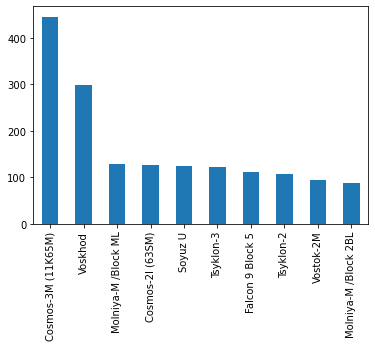

In [75]:
pop_rockets[:10].plot(kind='bar')

In [37]:
popular_rockets[-10:]  #Least Popular Rockets

Proton K/Block-DM      1
Delta II 7425-10C      1
Long March 2D/YZ-3     1
Long March 2C/SMA      1
Atlas V 511            1
OS-M1                  1
Long March 6A          1
Scout X-2              1
Proton-M               1
Atlas-SLV3 Burner-2    1
Name: Rocket, dtype: int64

## Yearly Launches

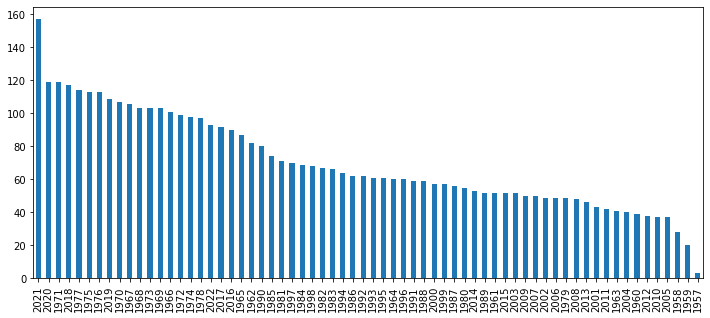

In [124]:
sp["Year"].value_counts().plot.bar(figsize=(12,5))

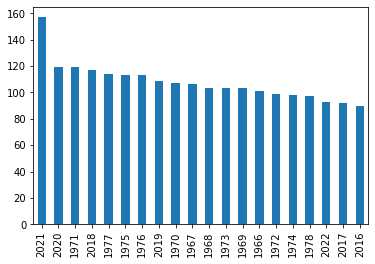

In [158]:
sp["Year"].value_counts()[:20].plot.bar()

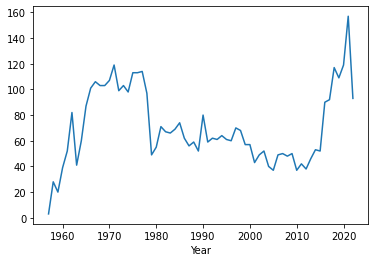

In [157]:
sp["Year"].groupby(sp["Year"]).count() .plot(kind="line")

- Heighest Launches in 2021
- In 1971 & 2020 we had made same no .of launches - 119

**Comparing 90's & 2k launches**

In [129]:
launchesin90 = (sp["Year"]).value_counts(bins=[1901,1999])
launchesin90

(1900.999, 1999.0]    3110
Name: Year, dtype: int64

In [130]:
launchesin2k = (sp["Year"]).value_counts(bins=[2001,2022])
launchesin2k

(2000.999, 2022.0]    1463
Name: Year, dtype: int64

In [132]:
(launchesin90/len(sp)) *100

(1900.999, 1999.0]    67.170626
Name: Year, dtype: float64

In [133]:
(launchesin2k/len(sp))*100

(2000.999, 2022.0]    31.598272
Name: Year, dtype: float64

- Space launches were active in 90's than 2k

In [146]:
(sp["Year"]).value_counts(bins=12,sort=False)

(1956.934, 1962.417]    224
(1962.417, 1967.833]    395
(1967.833, 1973.25]     634
(1973.25, 1978.667]     535
(1978.667, 1984.083]    377
(1984.083, 1989.5]      303
(1989.5, 1994.917]      326
(1994.917, 2000.333]    373
(2000.333, 2005.75]     221
(2005.75, 2011.167]     276
(2011.167, 2016.583]    279
(2016.583, 2022.0]      687
Name: Year, dtype: int64

In [215]:
#Get the year-wise price
sp.groupby('Year')['Year'].count()[12:]


Year
1969    103
1970    107
1971    119
1972     99
1973    103
1974     98
1975    113
1976    113
1977    114
1978     97
1979     49
1980     55
1981     71
1982     67
1983     66
1984     69
1985     74
1986     62
1987     56
1988     59
1989     52
1990     80
1991     59
1992     62
1993     61
1994     64
1995     61
1996     60
1997     70
1998     68
1999     57
2000     57
2001     43
2002     49
2003     52
2004     40
2005     37
2006     49
2007     50
2008     48
2009     50
2010     37
2011     42
2012     38
2013     46
2014     53
2015     52
2016     90
2017     92
2018    117
2019    109
2020    119
2021    157
2022     93
Name: Year, dtype: int64

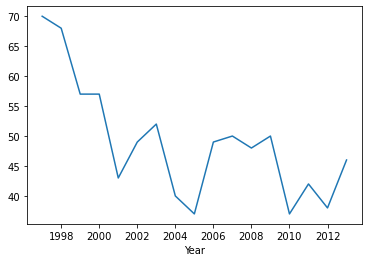

In [223]:
sp.groupby('Year')['Year'].count()[40:-9].plot.line() #2000-2017


- In 90's (1967-1973) and in 2000's (2016-2022) had the pea launches.
- No.of launches started to decrease from 1978, almost 50% less than previous year 1977
- Max of only 80 launches from 200-2012
- Loest laucnh year periods are in  1956-1962 and 2000-2005

## Monthly Launches

In [255]:
sm = sp.Month.sort_values()
sm

2416     1
1354     1
1355     1
1356     1
329      1
        ..
823     12
822     12
821     12
4255    12
4138    12
Name: Month, Length: 4630, dtype: int64

In [259]:
launch_months = (sp["Month"]).value_counts()
launch_months

12    492
6     431
4     409
10    403
8     391
9     386
7     380
3     378
11    365
2     361
5     350
1     284
Name: Month, dtype: int64

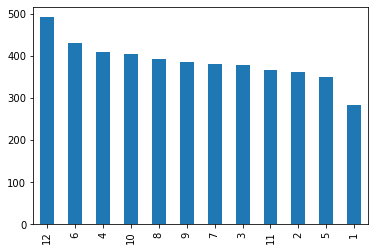

In [250]:
launch_months.plot.bar()

- Most Launches happened in December, June, April

## Hourly Analysis

In [265]:
most_launch_hour = (sp["Hour"]).value_counts()
most_launch_hour

11    244
12    241
09    240
10    228
22    220
13    216
08    203
14    201
00    197
07    192
23    190
21    187
18    186
01    180
15    175
03    165
20    163
16    163
06    162
04    155
05    154
19    154
17    153
02    134
Na    127
Name: Hour, dtype: int64

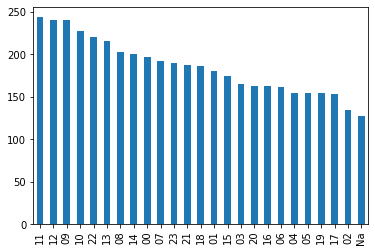

In [266]:
most_launch_hour.plot(kind='bar')

In [267]:
#Series to numeric
hr = pd.to_numeric(sp['Hour'],errors='coerce')
hr

0       19.0
1        2.0
2       16.0
3        3.0
4        7.0
        ... 
4625    17.0
4626     6.0
4627    13.0
4628     4.0
4629    13.0
Name: Hour, Length: 4630, dtype: float64

In [274]:
hr.value_counts(bins=[0,6,12,24],normalize = True)

(12.0, 24.0]     0.433693
(6.0, 12.0]      0.291145
(-0.001, 6.0]    0.247732
Name: Hour, dtype: float64

In [272]:
hr.value_counts(bins=[0,6,12,18,24])

(6.0, 12.0]      1348
(-0.001, 6.0]    1147
(12.0, 18.0]     1094
(18.0, 24.0]      914
Name: Hour, dtype: int64

In [270]:
hr.value_counts(bins=[0,6,12,18,24],normalize=True)

(6.0, 12.0]      0.291145
(-0.001, 6.0]    0.247732
(12.0, 18.0]     0.236285
(18.0, 24.0]     0.197408
Name: Hour, dtype: float64

- Most launches too place from 6-12
- We can see that 4 bins resulted in "43% of launches took place rom 12-24" 
    but 5 bins showed clearly that "29% launches in 6-12

In [275]:
hr.value_counts(bins=[0,3,6,9,12,15,18,21,24])

(9.0, 12.0]      713
(-0.001, 3.0]    676
(6.0, 9.0]       635
(12.0, 15.0]     592
(18.0, 21.0]     504
(15.0, 18.0]     502
(3.0, 6.0]       471
(21.0, 24.0]     410
Name: Hour, dtype: int64

- Among the 29% of launches from 6-12 , 713 launches took place from 9-12

## Price Analysis

In [283]:
notnullprice = sp['Price'][~sp['Price'].isnull()]
notnullprice

303     63.23
323     63.23
330     63.23
352     63.23
468     59.00
        ...  
4623    30.80
4624    67.00
4625    67.00
4627    67.00
4629    29.75
Name: Price, Length: 1265, dtype: float64

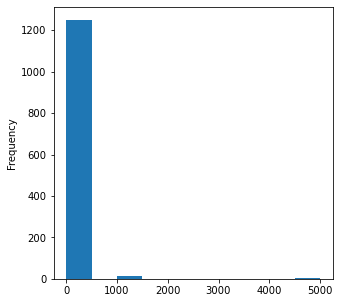

In [287]:
notnullprice.plot.hist(figsize=(5,5))

**To display all values print as string**
print(notnullprice.sort_values(ascending= False).to_string()) 

- Highest cost of was **5000M**
- Lowest cost was **450M**
- From Histigram, Most launches(1250) costed **less than 1000M**

In [105]:
sp.loc[(sp['Price']==5000)]

,Company,Location,Date,Year,Month,Time,Hour,Rocket,Mission,RocketStatus,Price,MissionStatus
2323,RVSN USSR,"Site 250, Baikonur Cosmodrome, Kazakhstan",1987-05-15,1987,5,2023-06-23 17:30:00,17.0,Energiya/Polyus,Polyus Space Station,Retired,5000.0,Success
2407,RVSN USSR,"Site 110/37, Baikonur Cosmodrome, Kazakhstan",1988-11-15,1988,11,2023-06-23 03:00:00,3.0,Energiya/Buran,Buran,Retired,5000.0,Success


- 5000M - Russia- Energia - polyus(1987),Buran(1988

In [88]:
notnullprice.sum()

162304.45

In [100]:
sp['Price'].value_counts(normalize=True).head(10)

450.00    0.107510
67.00     0.087747
200.00    0.063241
64.68     0.045850
40.00     0.045059
30.80     0.038735
29.75     0.034783
25.00     0.033992
29.15     0.032411
62.00     0.032411
Name: Price, dtype: float64

- Around **136 or 10%** launches costed 450M

In [107]:
type(sp['Company']) # SERIES

type(sp) # DATAFRAME


pandas.core.frame.DataFrame

In [122]:
notnullprice.mean()

128.30391304347756

- Average launch price till 2022 is **128M**

In [301]:
#sp['Price'] = sp['Price'].astype('float')  // dint work because price column had NaN values too

#so first convert it to numeric 

sp['Price'] = pd.to_numeric(sp['Price'], errors='coerce')

In [302]:
sp.nlargest(n=3,columns='Price')

,Company,Location,Date,Year,Month,Day,Time,Hour,Rocket,Mission,RocketStatus,Price,MissionStatus,grade
2323,RVSN USSR,"Site 250, Baikonur Cosmodrome, Kazakhstan",1987-05-15,1987,5,15,17:30:00,17,Energiya/Polyus,Polyus Space Station,Retired,5000.0,Success,"(1899.999, 2000.0]"
2407,RVSN USSR,"Site 110/37, Baikonur Cosmodrome, Kazakhstan",1988-11-15,1988,11,15,03:00:00,03,Energiya/Buran,Buran,Retired,5000.0,Success,"(1899.999, 2000.0]"
607,NASA,"LC-39A, Kennedy Space Center, Florida, USA",1967-11-09,1967,11,9,12:00:00,12,Saturn V,Apollo 4,Retired,1160.0,Success,"(1899.999, 2000.0]"


In [304]:
sp.nsmallest(n=3,columns='Price')

,Company,Location,Date,Year,Month,Day,Time,Hour,Rocket,Mission,RocketStatus,Price,MissionStatus,grade
4333,Astra,"LP-3B, Pacific Spaceport Complex, Kodiak, Alas...",2020-09-12,2020,9,12,03:19:00,03,Rocket 3,Rocket 3.1,Active,2.5,Failure,"(2000.0, 2022.0]"
4373,Astra,"LP-3B, Pacific Spaceport Complex, Kodiak, Alas...",2020-12-15,2020,12,15,20:55:00,20,Rocket 3,Rocket 3.2,Active,2.5,Failure,"(2000.0, 2022.0]"
4472,Astra,"LP-3B, Pacific Spaceport Complex, Kodiak, Alas...",2021-08-28,2021,8,28,22:35:00,22,Rocket 3,STP-27AD1,Active,2.5,Failure,"(2000.0, 2022.0]"


## Rocket Analysis

In [305]:
sp[sp['Rocket']== 'Vanguard']

,Company,Location,Date,Year,Month,Day,Time,Hour,Rocket,Mission,RocketStatus,Price,MissionStatus,grade
2,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06,1957,12,6,16:44:00,16,Vanguard,Vanguard TV3,Retired,NaN,Failure,"(1899.999, 2000.0]"
4,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05,1958,2,5,07:33:00,07,Vanguard,Vanguard TV3BU,Retired,NaN,Failure,"(1899.999, 2000.0]"
6,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-03-17,1958,3,17,12:15:00,12,Vanguard,Vanguard 1,Retired,NaN,Success,"(1899.999, 2000.0]"
9,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-04-28,1958,4,28,02:53:00,02,Vanguard,Vanguard TV5,Retired,NaN,Failure,"(1899.999, 2000.0]"
11,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-05-28,1958,5,28,03:46:00,03,Vanguard,Vanguard SLV-1,Retired,NaN,Failure,"(1899.999, 2000.0]"
12,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-06-26,1958,6,26,05:00:00,05,Vanguard,Vanguard SLV-2,Retired,NaN,Failure,"(1899.999, 2000.0]"
23,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-09-26,1958,9,26,15:38:00,15,Vanguard,Vanguard SLV-3,Retired,NaN,Failure,"(1899.999, 2000.0]"
32,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1959-02-17,1959,2,17,15:55:00,15,Vanguard,Vanguard 2,Retired,NaN,Success,"(1899.999, 2000.0]"
35,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1959-04-14,1959,4,14,02:49:00,02,Vanguard,Vanguard SLV-5,Retired,NaN,Failure,"(1899.999, 2000.0]"
38,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1959-06-22,1959,6,22,20:16:00,20,Vanguard,Vanguard SLV-6,Retired,NaN,Failure,"(1899.999, 2000.0]"


In [296]:
r = sp['Rocket']== 'Saturn V'
s = sp['MissionStatus']== 'Failure'

sp[r&s]

,Company,Location,Date,Year,Month,Day,Time,Hour,Rocket,Mission,RocketStatus,Price,MissionStatus,grade


In [32]:
r = sp['Rocket']== 'Saturn V'
s = sp['MissionStatus']== 'Success'  # != 'Failure'

sp[r&s]

,Company,Location,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus
607,NASA,"LC-39A, Kennedy Space Center, Florida, USA",1967-11-09,12:00:00,Saturn V,Apollo 4,Retired,"1,160.00",Success
720,NASA,"LC-39A, Kennedy Space Center, Florida, USA",1968-12-21,12:51:00,Saturn V,Apollo 8,Retired,"1,160.00",Success
739,NASA,"LC-39A, Kennedy Space Center, Florida, USA",1969-03-03,16:00:00,Saturn V,Apollo 9,Retired,"1,160.00",Success
763,NASA,"LC-39B, Kennedy Space Center, Florida, USA",1969-05-18,16:49:00,Saturn V,Apollo 10,Retired,"1,160.00",Success
778,NASA,"LC-39A, Kennedy Space Center, Florida, USA",1969-07-16,13:32:00,Saturn V,Apollo 11,Retired,"1,160.00",Success
812,NASA,"LC-39A, Kennedy Space Center, Florida, USA",1969-11-14,16:22:00,Saturn V,Apollo 12,Retired,"1,160.00",Success
848,NASA,"LC-39A, Kennedy Space Center, Florida, USA",1970-04-11,19:13:00,Saturn V,Apollo 13,Retired,"1,160.00",Success
939,NASA,"LC-39A, Kennedy Space Center, Florida, USA",1971-01-31,21:03:00,Saturn V,Apollo 14,Retired,"1,160.00",Success
995,NASA,"LC-39A, Kennedy Space Center, Florida, USA",1971-07-26,13:34:00,Saturn V,Apollo 15,Retired,"1,160.00",Success
1080,NASA,"LC-39A, Kennedy Space Center, Florida, USA",1972-04-16,17:54:00,Saturn V,Apollo 16,Retired,"1,160.00",Success


- Saturn V rocet was a successfull rocet with no complete failures (only 1 partial failure)

In [48]:
sp['MissionStatus'] = sp['MissionStatus'].astype('category')

In [306]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4630 entries, 0 to 4629
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Company        4630 non-null   object        
 1   Location       4630 non-null   object        
 2   Date           4630 non-null   datetime64[ns]
 3   Year           4630 non-null   int64         
 4   Month          4630 non-null   int64         
 5   Day            4630 non-null   int64         
 6   Time           4503 non-null   object        
 7   Hour           4630 non-null   object        
 8   Rocket         4630 non-null   object        
 9   Mission        4630 non-null   object        
 10  RocketStatus   4630 non-null   object        
 11  Price          1265 non-null   float64       
 12  MissionStatus  4630 non-null   object        
 13  grade          4630 non-null   category      
dtypes: category(1), datetime64[ns](1), float64(1), int64(3), object(8)
memor

### Missions Status Analysis by Rockets,Year


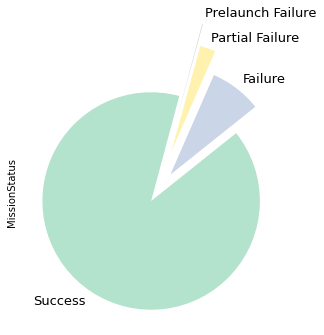

In [386]:
import matplotlib as plot

kwargs = dict(
    startangle = 75,
    colormap   = 'Pastel2',
    fontsize   = 13,
    explode    = (0.1,0.2,0.4,0.6),
    figsize    = (60,5),
    #utopct    = '%1.1f%%',
    #itle      = 'Mission Status Distribution'
)

sp['MissionStatus'].value_counts().plot.pie(**kwargs)

In [378]:
sp.groupby("Rocket")['MissionStatus'].count()

Rocket
ASLV                4
Angara 1.2          2
Angara A5/Briz-M    2
Angara A5/Persey    1
Antares 110         2
                   ..
Zenit-3 SLB         6
Zenit-3 SLBF        4
Zhongke-1A          1
ZhuQue-1            1
Zoljanah            1
Name: MissionStatus, Length: 370, dtype: int64

In [354]:
(sp[sp.MissionStatus == 'Success'].groupby("Rocket").MissionStatus.count().reset_index()).sort_values(
    by = ['MissionStatus'],ascending=False)

,Rocket,MissionStatus
75,Cosmos-3M (11K65M),419
325,Voskhod,283
194,Molniya-M /Block ML,122
73,Cosmos-2I (63SM),118
274,Soyuz U,118
...,...,...
170,Long March 3C,1
160,Long March 2D/YZ-3,1
157,Long March 2C/SMA,1
149,Lambda-IV S,1


In [342]:
# Rocket Analysis based on Mission Success

(sp[sp.MissionStatus == 'Success'].groupby("Rocket").MissionStatus.count().reset_index()).sort_values(
    by = ['MissionStatus'],ascending=False)

# OR

# sp.groupby("Rocket")["MissionStatus"].apply(lambda su:su.str.contains("Success").sum()).nlargest(5)


,Rocket,MissionStatus
75,Cosmos-3M (11K65M),419
325,Voskhod,283
194,Molniya-M /Block ML,122
73,Cosmos-2I (63SM),118
274,Soyuz U,118
...,...,...
170,Long March 3C,1
160,Long March 2D/YZ-3,1
157,Long March 2C/SMA,1
149,Lambda-IV S,1


In [344]:
# Rocket Analysis based on Mission Failure

(sp[sp.MissionStatus == 'Failure'].groupby("Rocket").MissionStatus.count().reset_index()).sort_values(
    by = ['MissionStatus'],ascending=False).head(5)

# OR

# sp.groupby("Rocket")["MissionStatus"].apply(lambda su:su.str.contains("Failure").sum()).nlargest(5)

,Rocket,MissionStatus
41,Cosmos-3M (11K65M),19
76,Molniya,16
148,Voskhod,13
38,Cosmos-2I (63S1),12
90,Proton K/Block D,12


In [346]:
# Rocket Analysis based on Partial Mission Failure

(sp[sp.MissionStatus == 'Partial Failure'].groupby("Rocket").MissionStatus.count().reset_index()).sort_values(
    by = ['MissionStatus'],ascending=False).head(5)

,Rocket,MissionStatus
12,Cosmos-3M (11K65M),8
27,Molniya-M /Block ML,5
48,Starship Prototype,3
60,Voskhod,3
38,SARGE,3


In [385]:
# Rocket Analysis based on Prelaunch Mission Failure

(sp[sp.MissionStatus == 'Prelaunch Failure'].groupby("Rocket").MissionStatus.count().reset_index()).sort_values(
    by = ['MissionStatus'],ascending=False)

,Rocket,MissionStatus
0,Falcon 9 Block 3,1
1,Safir-1B+,1
2,Soyuz,1
3,VLS-1,1


- Voskhod had 283-Success, 13-Failures, 3-Partial Failures
- Prelaunch failure has occured only 4 times  with the above rockets


In [409]:
ndf = pd.DataFrame(sp.groupby(['Year','MissionStatus']).size().to_frame('Count').reset_index())
ndf

,Year,MissionStatus,Count
0,1957,Failure,1
1,1957,Success,2
2,1958,Failure,20
3,1958,Partial Failure,2
4,1958,Success,6
...,...,...,...
179,2021,Failure,11
180,2021,Partial Failure,3
181,2021,Success,143
182,2022,Failure,3


In [413]:
ndf.loc[(ndf['Year']==1969)]

,Year,MissionStatus,Count
34,1969,Failure,17
35,1969,Partial Failure,1
36,1969,Success,85
